<a href="https://colab.research.google.com/github/Bishre313/testing/blob/main/Intermediate__Assessment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



#load dat set

In [ ]:
train_data=pd.read_csv("/content/train_LZdllcl.csv")
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#EDA

In [ ]:
train_data.shape

(54808, 14)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
train_data.duplicated().sum()

np.int64(0)

In [ ]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [ ]:
train_data.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


#preprocessing

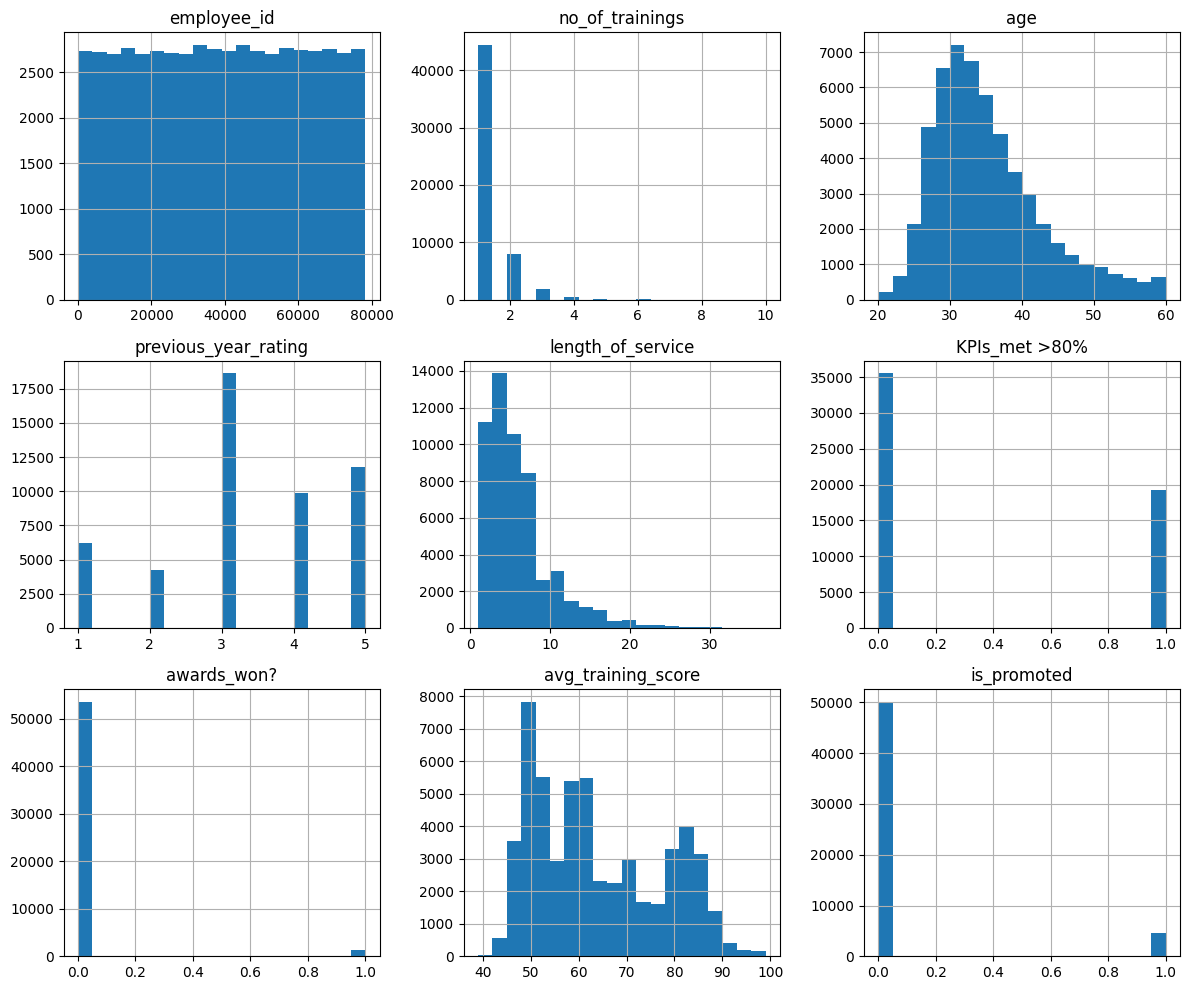

In [ ]:
train_data.select_dtypes(include=["number"]).hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
train_data.replace('?',np.nan,inplace=True)

In [ ]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [ ]:
#replasing numerical with mean
train_data['previous_year_rating']=train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median())

In [ ]:
#replasing categorical  with mode
train_data['education']=train_data['education'].fillna(train_data['education'].mode()[0])

In [ ]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


#out layers

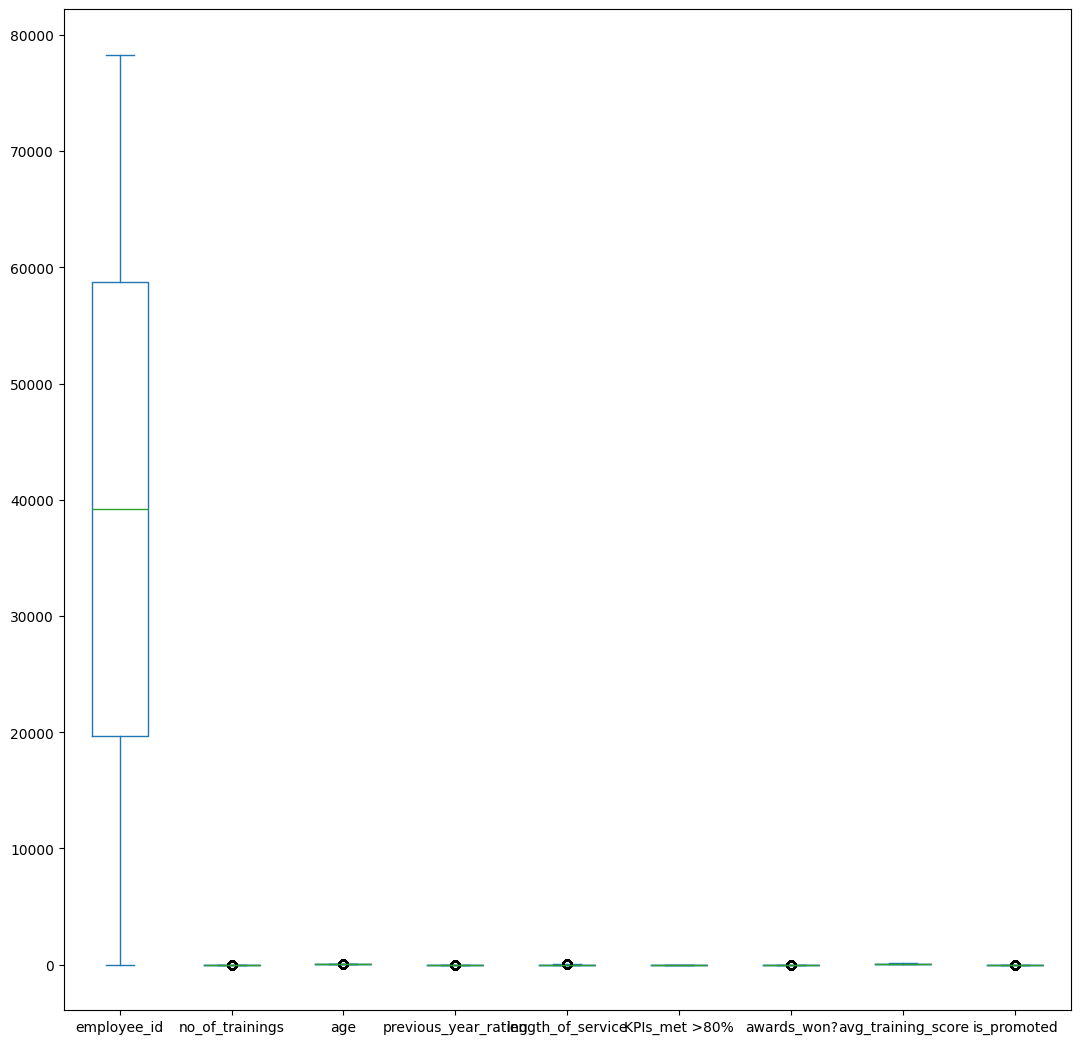

In [ ]:
out_layer=train_data.plot(kind='box',figsize=(13,13))

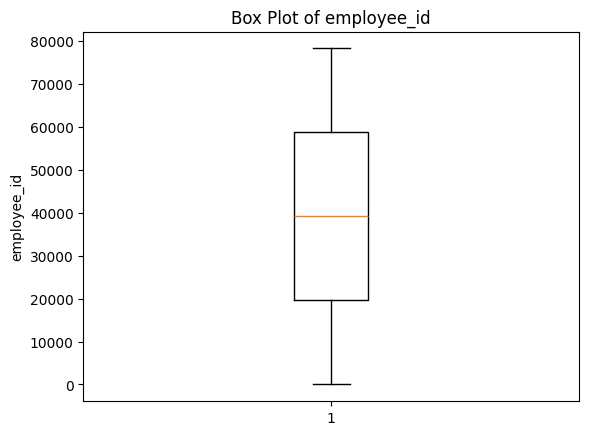

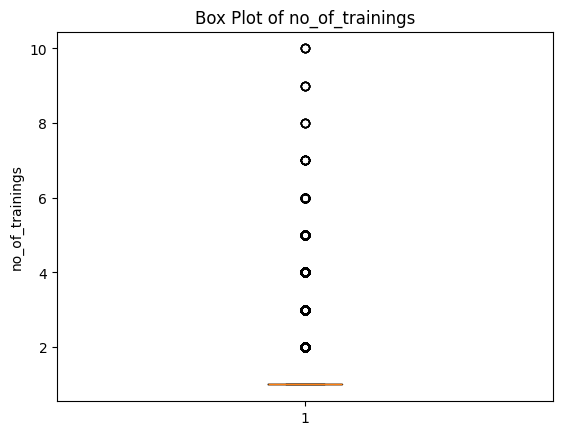

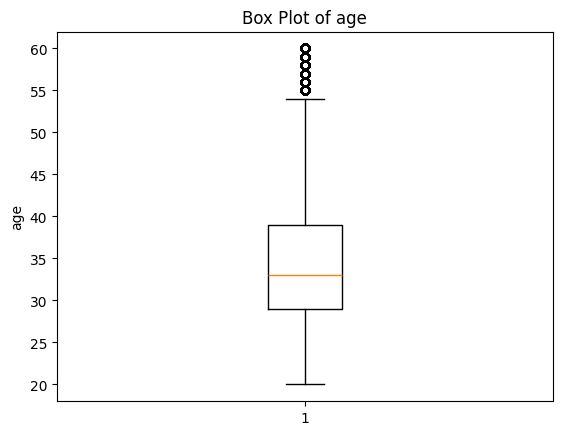

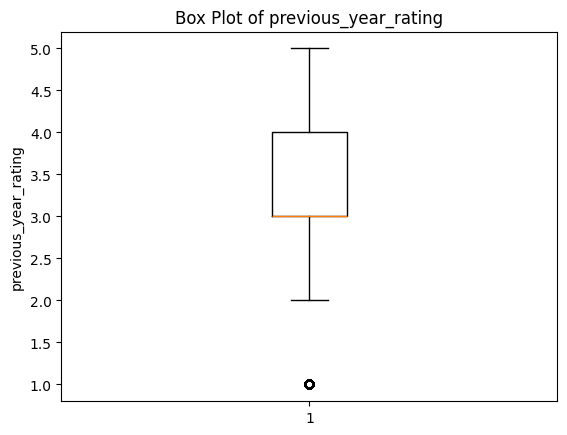

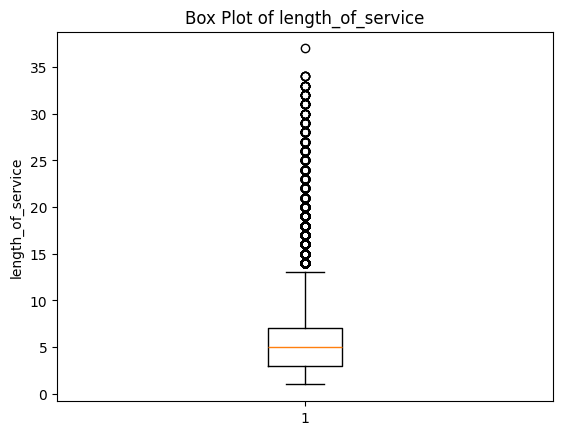

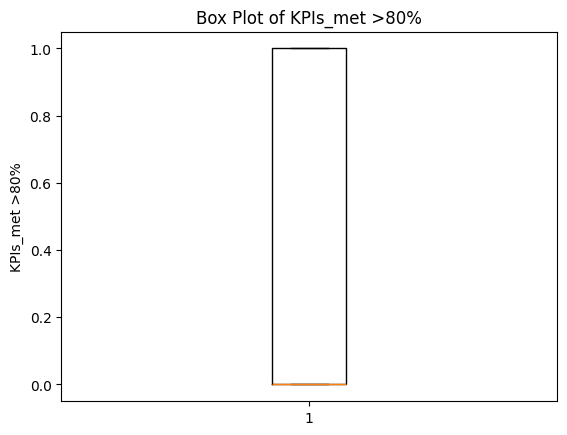

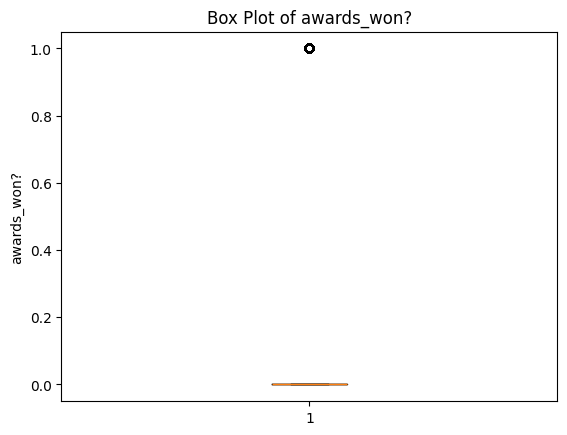

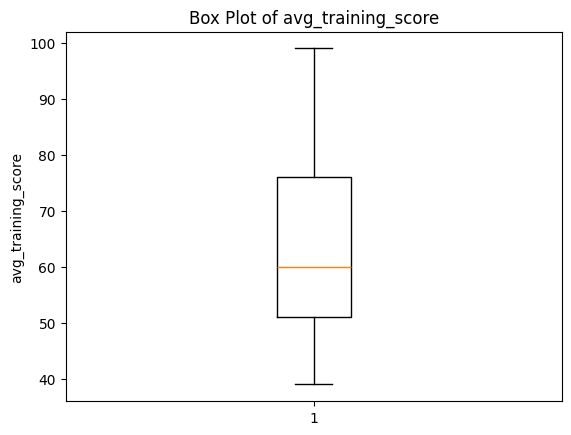

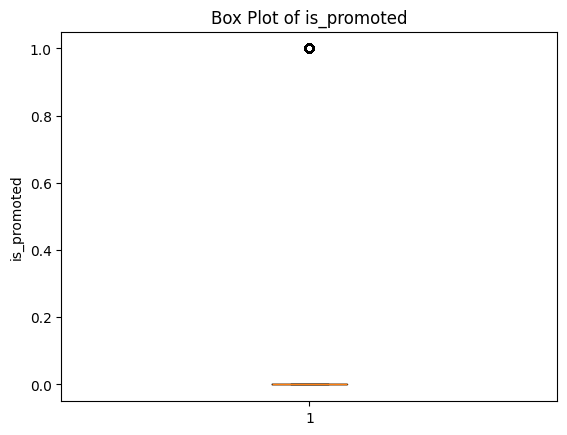

In [ ]:
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure()
    plt.boxplot(train_data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()


#outlayer handaling

In [ ]:
handling=("age","length_of_service")
for i in handling:

  q1=np.percentile(train_data[i],25)
  q3=np.percentile(train_data[i],75)
  iqr=q3-q1

  up_val=q3+(1.5*iqr)
  low_val=q1-(1.5*iqr)
#clipping
  train_data[i]=train_data[i].clip(lower=low_val,upper=up_val)

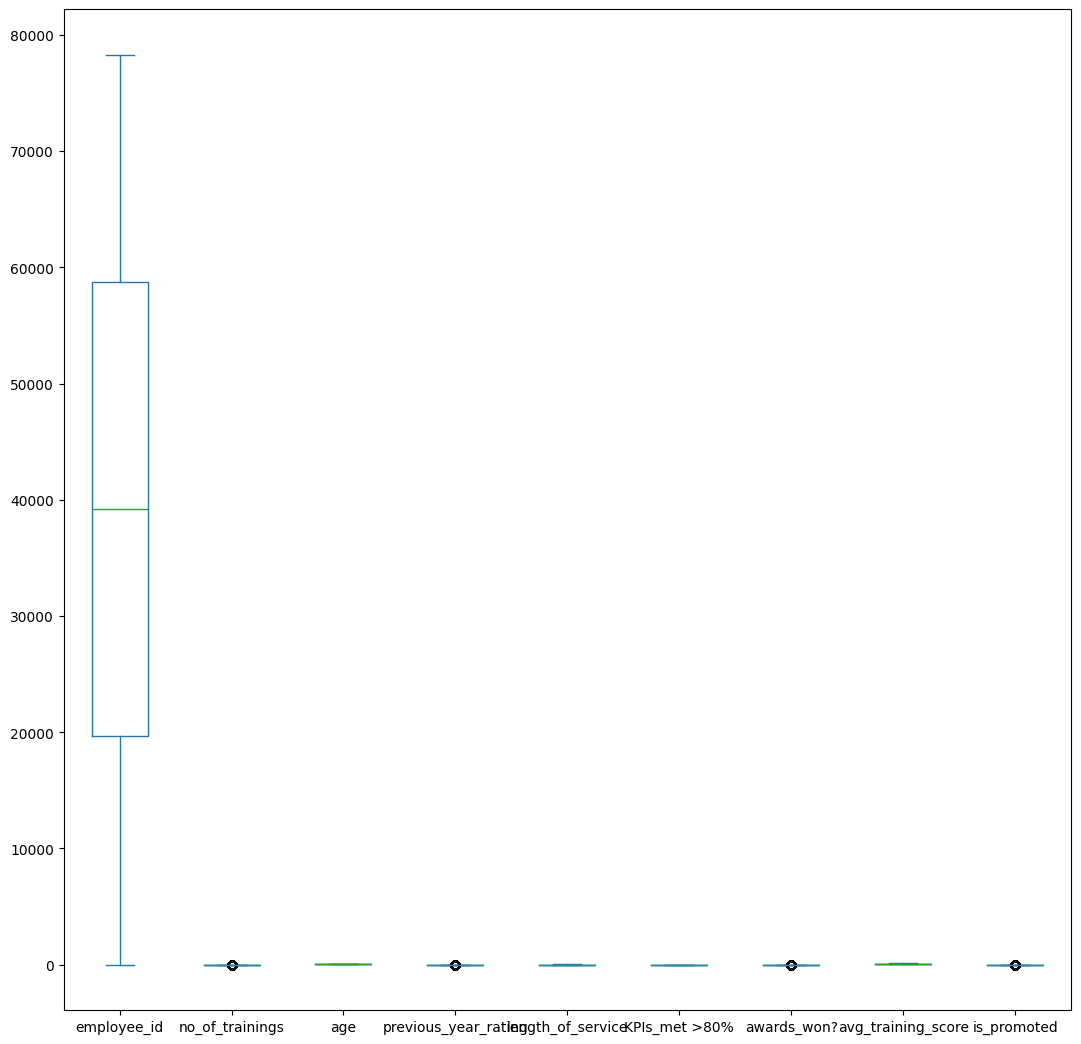

In [ ]:
out_layer=train_data.plot(kind='box',figsize=(13,13))

#Encoding

In [ ]:
train_data.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,35
previous_year_rating,5
length_of_service,13


In [ ]:
 train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#corrilation
train1=train_data.select_dtypes(include=['number'])
corr=train1.corr()
corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000254,0.004209,0.000612,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.082247,-0.061564,-0.059035,-0.045576,-0.007628,0.042517,-0.024896
age,0.000254,-0.082247,1.000000,0.027735,0.640451,-0.025006,-0.008181,-0.049246,-0.016892
previous_year_rating,0.004209,-0.061564,0.027735,1.000000,0.028387,0.337367,0.026587,0.071926,0.153230
length_of_service,0.000612,-0.059035,0.640451,0.028387,1.000000,-0.077047,-0.040632,-0.040358,-0.007287
KPIs_met >80%,-0.002501,-0.045576,-0.025006,0.337367,-0.077047,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008181,0.026587,-0.040632,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.049246,0.071926,-0.040358,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.016892,0.153230,-0.007287,0.221582,0.195871,0.181147,1.000000


<Axes: >

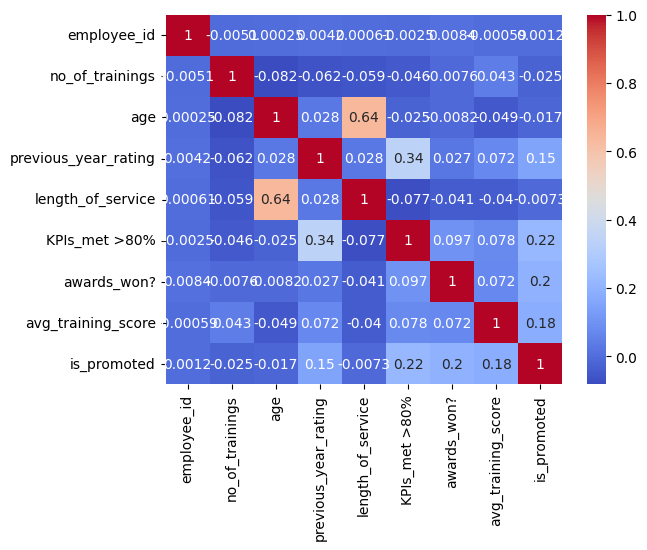

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
num_cols = train_data.select_dtypes(include=['number']).columns
cat_cols = train_data.select_dtypes(include=['object']).columns

In [ ]:
data_encoded = pd.get_dummies(train_data, columns=cat_cols, drop_first=True).astype(int)

In [ ]:
data_encoded.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5,8,1,0,49,0,0,...,0,0,1,0,0,0,1,0,0,1
1,65141,1,30,5,4,0,0,60,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7513,1,34,3,7,0,0,50,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2542,2,39,1,10,0,0,50,0,0,...,0,0,0,0,0,0,0,1,0,0
4,48945,1,45,3,2,0,0,73,0,0,...,0,0,0,0,0,0,0,1,0,0


#scaling


In [ ]:
scaler =StandardScaler()
scaled_data=scaler.fit_transform(data_encoded)
scaled_data

array([[ 1.16185837, -0.41527615,  0.03809297, ..., -1.53622276,
        -0.14587586,  1.16635286],
       [ 1.14870885, -0.41527615, -0.6361737 , ...,  0.65094726,
        -0.14587586, -0.85737347],
       [-1.40274081, -0.41527615, -0.09676037, ...,  0.65094726,
        -0.14587586,  1.16635286],
       ...,
       [-1.11916278, -0.41527615, -1.0407337 , ...,  0.65094726,
        -0.14587586, -0.85737347],
       [-1.13262222, -0.41527615, -0.77102704, ...,  0.65094726,
        -0.14587586,  1.16635286],
       [ 0.54591182, -0.41527615, -1.0407337 , ...,  0.65094726,
        -0.14587586, -0.85737347]])

#split



In [ ]:
X=train_data.drop('is_promoted',axis=1)
y=train_data['is_promoted']

In [ ]:
cat_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#models


#random forest model

In [ ]:

random_forest = RandomForestClassifier(random_state=42)

# Train model
random_forest.fit(X_train, y_train)

# Predictions
random_forest_pred = random_forest.predict(X_test)

# Accuracy
print("Training Accuracy :", random_forest.score(X_train, y_train))
print("Testing Accuracy :", random_forest.score(X_test, y_test))


Training Accuracy : 0.9999771929024313
Testing Accuracy : 0.9377850757161103


In [ ]:

# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Predict on test data
y_test_pred = random_forest.predict(X_test)

# Calculate metrics (safe for binary & multiclass)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print metrics
print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1 Score  :", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)

# Detailed Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Accuracy  : 0.9377850757161103
Precision : 0.9356119028914774
Recall    : 0.9377850757161103
F1 Score  : 0.9223601772906781

Confusion Matrix:
 [[10026    28]
 [  654   254]]

Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.90      0.28      0.43       908

    accuracy                           0.94     10962
   macro avg       0.92      0.64      0.70     10962
weighted avg       0.94      0.94      0.92     10962



#logic regression


In [ ]:
logic_regression= LogisticRegression(max_iter=1000)
logic_regression.fit(X_train, y_train)

logic_regression_pred =logic_regression.predict(X_test)

print("Training Accuracy :", logic_regression.score(X_train, y_train))
print("Testing Accuracy :", logic_regression.score(X_test, y_test))

Training Accuracy : 0.9162067235323633
Testing Accuracy : 0.9189928845101258


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#evaluation
y_test_pred = logic_regression.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Accuracy : 0.9189928845101258
Precision: 0.5515463917525774
Recall   : 0.11784140969162996
F1 Score : 0.19419237749546278
Confusion Matrix:
 [[9967   87]
 [ 801  107]]


#KNN


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print("Training Accuracy :", knn.score(X_train, y_train))
print("Testing  Accuracy :", knn.score(X_test, y_test))

Training Accuracy : 0.9181225197281394
Validation Accuracy : 0.9121510673234812


In [ ]:
#evaluation
y_test_pred = knn.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Accuracy : 0.9121510673234812
Precision: 0.1518987341772152
Recall   : 0.013215859030837005
F1 Score : 0.0243161094224924
Confusion Matrix:
 [[9987   67]
 [ 896   12]]


In [ ]:
submit = []
def evaluate_model(model, model_name):
      # Predict on test data
      y_test_pred = model.predict(X_test)
      submit.append({
        "Model": model_name,
        "Train Accuracy": model.score(X_train, y_train),
        "Validation Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred)
    })


In [ ]:
evaluate_model(random_forest, "Random Forest")# Random Forest
evaluate_model(logic_regression , "Logistic Regression")# Logistic Regression
evaluate_model(knn, "KNN")# KNN

submit_data = pd.DataFrame(submit)
submit_data


,Model,Train Accuracy,Validation Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.999977,0.937785,0.900709,0.279736,0.426891
1,Logistic Regression,0.916207,0.918993,0.551546,0.117841,0.194192
2,KNN,0.918123,0.912151,0.151899,0.013216,0.024316
3,Random Forest,0.999977,0.937785,0.900709,0.279736,0.426891
4,Logistic Regression,0.916207,0.918993,0.551546,0.117841,0.194192
5,KNN,0.918123,0.912151,0.151899,0.013216,0.024316


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

_base = RandomForestClassifier(random_state=42)

tuned_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=3,
    cv=2,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Starting ultra-fast search...")
tuned_search.fit(X_train, y_train)

best_rf_model = tuned_search.best_estimator_
print("Done! Best Params:", tuned_search.best_params_)

Starting ultra-fast search...
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Done! Best Params: {'n_estimators': 50, 'max_depth': 15, 'criterion': 'entropy'}


In [ ]:
val_pred_original =random_forest.predict(X_test)
val_pred_tuned = best_rf_model.predict(X_test)

metrics = {
    'Metric': ['Accuracy', 'F1-Score'],
    'Before Tuning': [
        accuracy_score(y_test, val_pred_original),
        f1_score(y_test, val_pred_original)
    ],
    'After Tuning': [
        accuracy_score(y_test, val_pred_tuned),
        f1_score(y_test, val_pred_tuned)
    ]
}

comparison_df = pd.DataFrame(metrics)
print("Model Performance Comparison (Validation Set) ")
print(comparison_df)

improvement = ((metrics['After Tuning'][1] - metrics['Before Tuning'][1]) / metrics['Before Tuning'][1]) * 100
print(f"\nOverall F1-Score Improvement: {improvement:.2f}%")

Model Performance Comparison (Validation Set) 
     Metric  Before Tuning  After Tuning
0  Accuracy       0.937785      0.934592
1  F1-Score       0.426891      0.355795

Overall F1-Score Improvement: -16.65%
